# Exercise 1: Familiarize yourself with `pandas`
If you are new to Python, check out the introductory Python courses available through Caltrans's LinkedIn Learning Library:
* https://www.linkedin.com/learning/search?keywords=python&u=36029164

Skills: 
* `pandas` is one of the base Python packages for working with tabular data.
* Do some grouping and aggregation. Many ways to do this!
* Export to Google Cloud Storage
* Practice committing on GitHub

References: 
* https://docs.calitp.org/data-infra/analytics_new_analysts/01-data-analysis-intro.html
* https://docs.calitp.org/data-infra/analytics_tools/saving_code.html

In [1]:
from siuba import *
from siuba.data import mtcars

import pandas as pd


## Groupby / Aggregation

* By cylinder categories, calculate the average mpg and find difference between max and min weight.
* Hint: for `pandas`: `groupby / agg`, `pivot_table`, `groupby / transform`
* Hint: for `siuba`: `groupby`, `summarize`

In [19]:
mtcars.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [27]:
#PANDAS
#using groupby to get average MPG, grouped by cyl
mtcars.groupby('cyl').mpg.mean()

cyl
4    26.663636
6    19.742857
8    15.100000
Name: mpg, dtype: float64

In [45]:
#PANDAS
#using agg() to include other agg functions

mtcars.groupby('cyl').wt.agg(['mean','min','max'])

,mean,min,max
cyl,,,
4,2.285727,1.513,3.190
6,3.117143,2.620,3.460
8,3.999214,3.170,5.424


In [41]:
#PANDAS
#applying mean() to all col
mtcars.groupby('cyl').mean()


,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,19.137273,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


In [ ]:
# SIUBA
# multiple summarize adds new cols.
(mtcars
 >>group_by(_.cyl)
 >>summarize(
     avg_mpg = _.mpg.mean(),
     wt_diff = _.wt.max() - _.wt.min()
 )
)

## Functions

* Create a new column using a lambda function and tag 6 cylinder values with "six", and all other values as "other"
* Write a function that tags each cylinder value with the word (ex: 6 as "six", 8 as "eight")

In [50]:
#PANDAS

#new col for cyl name
mtcars['cyl name'] = mtcars.apply(lambda row: 'Six' if row.cyl == 6
                                 else 'other', axis = 1)

mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyl name
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Six
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Six
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,other
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Six
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,other
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,Six
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,other
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,other
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,other
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,Six


In [54]:
#new function to apply to entire df
# if cyl is 6, then change to "Six. if cyl is 8, change to "Eight" etc

def cyl_define(row):
    if row.cyl == '6':
        return 'Six'
    elif row.cyl == '8':
        return 'Eight'
    elif row.cyl == '4':
        return 'Four'

mtcars['cyl define'] = mtcars.apply(cyl_define,axis = 1)
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyl name,cyl define
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Six,None
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Six,None
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,other,None
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Six,None
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,other,None


In [ ]:
# SIUBA
# Complete
# muate. Runs the code in-place, but df not named
(mtcars
 >>mutate(
     cyl_rename = if_else(_.cyl == 6, 'six', 'other'))
)

In [ ]:
mtcars2

In [ ]:
# SIUBA
# COMPLETE
# case when to reaplce 6 with "six", 8 with "eight", 4 with "four".
# used mutate and named the df 'mtcars'
mtcars2 = (mtcars
 >>mutate(
     cyl_cat = case_when(mtcars, { 
        _.cyl == 6: "six",
        _.cyl == 8: "eight",
        _.cyl == 4: "four",
    })
 ))

In [ ]:
mtcars2

In [ ]:
# SIUBA
mtcars2>>mutate(
     cyl_cat2 = case_when(mtcars, { 
        _.cyl == 6: "other",
        _.cyl == 8: "eight2",
        _.cyl == 4: "four2",
    })
)    

## Export to Google Cloud Storage (GCS)

* Make sure credential works
* Use this path: "gs://calitp-analytics-data/data-analyses/FILENAME"
* Export using `df.to_parquet()` and `df.to_csv()`

In [ ]:
#getting error

from calitp_data_analysis import get_fs
fs = get_fs()

mtcars2.to_parquet('gs://calitp-analytics-data/data-analyses/csuyat_folder/exercise1_v2.parquet')

In [ ]:
#export df as csv. ensure output file name is .csv, not .parquet

from calitp_data_analysis import get_fs
fs = get_fs()

mtcars2.to_csv('gs://calitp-analytics-data/data-analyses/csuyat_folder/exercise1_v2.1.csv')

## Make a chart

* Read in the parquet file from GCS.
* Make a visualization using one of the charting packages.
* Name this notebook `YOURNAME_exercise1.ipynb`
    * If you need to rename because you already named it, do it within the terminal.
    * `git mv OLDNAME.ipynb NEWNAME.ipynb`. 
    * The `mv` stands for move, and renaming a file is basically "moving" its path. Doing it this way retains the git history associated with the notebook. If you rename directly with right click, rename, you destroy the git history.
* Use a descriptive commit message (ex: adding chart, etc). GitHub already tracks who makes the commit, the date, the timestamp of it, the files being affected, so your commit message should be more descriptive than the metadata already stored.

In [42]:
#names df as the parquet file from gcs

df = pd.read_parquet('gs://calitp-analytics-data/data-analyses/csuyat_folder/exercise1_v2.parquet')

/opt/conda/lib/python3.9/site-packages/google/auth/_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


<AxesSubplot:>

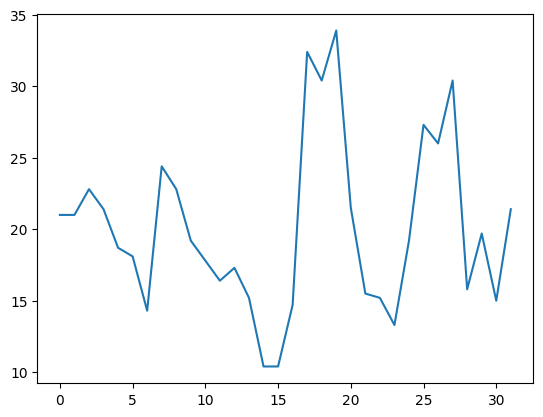

In [43]:
#plot a chart of the exercise1_v2 df, but only show the mpg col.
#any way to 
df['mpg'].plot()